In [5]:
import os
from statistics import median
import numpy as np
import pandas as pd
import functools as ft
from scipy.stats import wilcoxon

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

In [7]:
class ProcessEvoSuiteData:
    """ Class that processes data from EvoSuite. """

    def __init__(self):
        self.name = "ProcessEvoSuiteData"

    def print_name(self):
        os.system(f"echo The name is: {self.name}")

    def calculate_medians60(self):
        """ Extract results from the EvoSuite results csv files with time bugdet 60. """

        # Read EvoSuite results
        res60 = pd.read_csv("res_data/results-60.csv")
        configuration_ids = ['weak_60', 'branch_60', 'default_60']
        
        # Sort by configuration
        res = res60.loc[:,['TARGET_CLASS', 'configuration_id', 'project.id', 'BranchCoverage']]
        result = res[res.apply(lambda row : row["configuration_id"] in configuration_ids, axis=1)]

        # Take medians of the 10 runs of EvoSuite per class
        medians = result.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage'].median()
        medians.to_csv('medians.csv')

        # Compute differences between BRANCH;WEAKMUTATION and BRANCH
        res_medians = pd.read_csv("medians.csv")
        res_medians.to_csv('res_medians.csv')
        return

    def run_statistical_test(self):
        pass

    def get_ck_metrics(self):
        """ Will be used as features for the model. """

        class_metrics = pd.read_csv("ck_data/class.csv")
        class_metrics = class_metrics.iloc[:, 1:]
        return class_metrics

In [148]:
res60 = pd.read_csv("res_data/results-60.csv")
configuration_ids = ['weak_60', 'branch_60', 'default_60']

# Sort by configuration
res = res60.loc[:,['TARGET_CLASS', 'configuration_id', 'project.id', 'BranchCoverage']]
result = res[res.apply(lambda row : row["configuration_id"] in configuration_ids, axis=1)]

# "weak" groups
weak_result = result.loc[result['configuration_id'] == 'weak_60']
weak_groups = weak_result.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage']

# "branch" groups
branch_result = result.loc[result['configuration_id'] == 'branch_60']
branch_groups = branch_result.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage']

weak_classes = dict()
for name, group in weak_groups:
    weak_classes[name] = np.array(group)

branch_classes = dict()
for name, group in branch_groups:
    branch_classes[name] = np.array(group)

# If there are less than 10 runs for a class, pad the branch coverage with 0 
def pad(val1, val2):
    if val1.shape[0] == val2.shape[0]:
        return val1, val2
    if val1.shape[0] < val2.shape[0]:
        return np.pad(val1, [(0, val2.shape[0]-val1.shape[0])]), val2
    else:
        return val1, np.pad(val2, [(0, val1.shape[0]-val2.shape[0])])

# Calculate statistical significance per class
class_stats = dict()
for ((key1, val1), (key2, val2)) in zip(weak_classes.items(), branch_classes.items()):
    val1, val2 = pad(val1, val2)
    stats, p = (-2,-2) if (np.sum(np.subtract(val1, val2)) == 0) else wilcoxon(val1, val2)
    class_stats[key1[0]] = p
#     print(str(key1) + str(val1) + ", "+ str(key2) + str(val2) + " HAS P VALUE OF: " + str(p))

significant_class_stats = dict()
for (key, pval) in class_stats.items():
    if (pval > -2 and pval < 0.05):
        significant_class_stats[key] = pval 
    
statistical_sign_nclasses_60 = len(significant_class_stats)
cl_st60 = (len(class_stats))
print(statistical_sign_nclasses_60)
print(cl_st60)

228
336


In [149]:
res180 = pd.read_csv("res_data/results-180.csv")
configuration_ids180 = ['weak_180', 'branch_180', 'default_180']

# Sort by configuration
res1 = res180.loc[:,['TARGET_CLASS', 'configuration_id', 'project.id', 'BranchCoverage']]
result1 = res1[res1.apply(lambda row : row["configuration_id"] in configuration_ids180, axis=1)]

# "weak" groups
weak_result1 = result1.loc[result1['configuration_id'] == 'weak_180']
weak_groups1 = weak_result1.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage']

# "branch" groups
branch_result1 = result1.loc[result1['configuration_id'] == 'branch_180']
branch_groups1 = branch_result1.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage']

weak_classes180 = dict()
for name, group in weak_groups1:
    weak_classes180[name] = np.array(group)

branch_classes180 = dict()
for name, group in branch_groups1:
    branch_classes180[name] = np.array(group)

# If there are less than 10 runs for a class, pad the branch coverage with 0 
def pad1(val1, val2):
    if val1.shape[0] == val2.shape[0]:
        return val1, val2
    if val1.shape[0] < val2.shape[0]:
        return np.pad(val1, [(0, val2.shape[0]-val1.shape[0])]), val2
    else:
        return val1, np.pad(val2, [(0, val1.shape[0]-val2.shape[0])])

# Calculate statistical significance per class
class_stats180 = dict()
for ((key1, val1), (key2, val2)) in zip(weak_classes180.items(), branch_classes180.items()):
    val1, val2 = pad1(val1, val2)
    stats, p = (-2,-2) if (np.sum(np.subtract(val1, val2)) == 0) else wilcoxon(val1, val2)
    class_stats180[key1[0]] = p
#     print(str(key1) + str(val1) + ", "+ str(key2) + str(val2) + " HAS P VALUE OF: " + str(p))

significant_class_stats180 = dict()
for (key, pval) in class_stats180.items():
    if (pval > -2 and pval < 0.05):
        significant_class_stats180[key] = pval 
    
statistical_sign_nclasses_180 = len(significant_class_stats180)
cl_st180 = (len(class_stats180))
print(statistical_sign_nclasses_180)
print(cl_st180)

218
336


In [150]:
res300 = pd.read_csv("res_data/results-300.csv")
configuration_ids300 = ['weak_300', 'branch_300', 'default_300']

# Sort by configuration
res2 = res300.loc[:,['TARGET_CLASS', 'configuration_id', 'project.id', 'BranchCoverage']]
result2 = res2[res2.apply(lambda row : row["configuration_id"] in configuration_ids300, axis=1)]

# "weak" groups
weak_result2 = result2.loc[result2['configuration_id'] == 'weak_300']
weak_groups2 = weak_result2.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage']

# "branch" groups
branch_result2 = result2.loc[result2['configuration_id'] == 'branch_300']
branch_groups2 = branch_result2.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage']

weak_classes300 = dict()
for name, group in weak_groups2:
    weak_classes300[name] = np.array(group)

branch_classes300 = dict()
for name, group in branch_groups2:
    branch_classes300[name] = np.array(group)

# If there are less than 10 runs for a class, pad the branch coverage with 0 
def pad2(val1, val2):
    if val1.shape[0] == val2.shape[0]:
        return val1, val2
    if val1.shape[0] < val2.shape[0]:
        return np.pad(val1, [(0, val2.shape[0]-val1.shape[0])]), val2
    else:
        return val1, np.pad(val2, [(0, val1.shape[0]-val2.shape[0])])

# Calculate statistical significance per class
class_stats300 = dict()
for ((key1, val1), (key2, val2)) in zip(weak_classes300.items(), branch_classes300.items()):
    val1, val2 = pad1(val1, val2)
    stats, p = (-2,-2) if (np.sum(np.subtract(val1, val2)) == 0) else wilcoxon(val1, val2)
    class_stats300[key1[0]] = p
#     print(str(key1) + str(val1) + ", "+ str(key2) + str(val2) + " HAS P VALUE OF: " + str(p))

significant_class_stats300 = dict()
for (key, pval) in class_stats300.items():
    if (pval > -2 and pval < 0.05):
        significant_class_stats300[key] = pval 
    
statistical_sign_nclasses_300 = len(significant_class_stats300)
cl_st300 = (len(class_stats300))
print(statistical_sign_nclasses_300)
print(cl_st300)

275
334


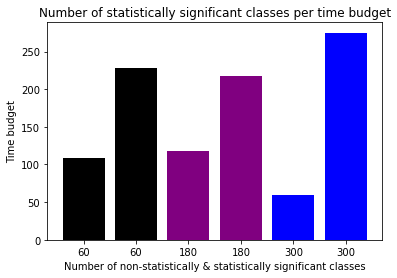

In [157]:
import matplotlib.pyplot as plt
  
# x axis values
x = [cl_st60 - statistical_sign_nclasses_60, statistical_sign_nclasses_60, cl_st180 - statistical_sign_nclasses_180, statistical_sign_nclasses_180, cl_st300 - statistical_sign_nclasses_300, statistical_sign_nclasses_300]
# corresponding y axis values
y = [60,60,180,180,300,300]
  
# create a dataset
height = x
bars = y
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height, color=['black', 'black', 'purple', 'purple', 'blue', 'blue'])

# naming the x axis
plt.xlabel('Number of non-statistically & statistically significant classes')
# naming the y axis
plt.ylabel('Time budget')
  
# giving a title to my graph
plt.title('Number of statistically significant classes per time budget')

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [9]:
# res60 = pd.read_csv("res_data/results-60.csv")
# configuration_ids = ['weak_60', 'branch_60', 'default_60']

# # Sort by configuration
# res = res60.loc[:,['TARGET_CLASS', 'configuration_id', 'project.id', 'BranchCoverage']]
# result = res[res.apply(lambda row : row["configuration_id"] in configuration_ids, axis=1)]

# # print(result.to_csv('outfil1.csv'))

# # Take medians of the 10 runs of EvoSuite per class
# medians = result.groupby(['TARGET_CLASS', 'configuration_id', 'project.id'])['BranchCoverage'].median()

# # This is stupid, but it works
# medians.to_csv('medians.csv')
# medians = pd.read_csv("medians.csv")

# # "weak" rows
# weak_medians = medians.loc[medians['configuration_id'] == 'weak_60'].drop(['configuration_id'], axis=1)
# # weak_medians.to_csv('weak_medians.csv')

# # "branch" rows
# branch_medians = medians.loc[medians['configuration_id'] == 'branch_60'].drop(['configuration_id'], axis=1)
# # branch_medians.to_csv('branch_medians.csv')

# diff = pd.merge(weak_medians, branch_medians, on=['TARGET_CLASS','project.id'], how='inner')
# diff['weak-branch'] = diff['BranchCoverage_y'] - diff['BranchCoverage_x']
# # diff = diff.drop(['BranchCoverage_y', 'BranchCoverage_x'], axis=1)

# # diff['p_wilcoxon'] = diff.apply(lambda row : -1 if (row['BranchCoverage_y'] - row['BranchCoverage_x'] == 0) else (wilcoxon([row['BranchCoverage_y']], [row['BranchCoverage_x']])[1])
# #                                 , axis = 1)

# diff['p_wilcoxon'] = diff.apply(lambda row : -1 if (row['weak-branch'] == 0) else (wilcoxon([row['weak-branch']])), axis = 1)
# diff['p_wilcoxon'].to_csv('wilc.csv')
# diff


# data = diff['weak-branch']*(-1)
# # Wilcoxon signed-rank test

# # compare samples
# stat, p = wilcoxon(data)
# print('Statistics=%.10f, p=%.10f' % (stat, p))

# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

# # Compute differences between BRANCH;WEAKMUTATION and BRANCH
# # res_medians = pd.read_csv("medians.csv")
# # res_medians.to_csv('res_medians.csv')

,TARGET_CLASS,project.id,BranchCoverage_x,BranchCoverage_y,weak-branch,p_wilcoxon
0,Capture,47_dvd-homevideo,0.103448,0.103448,0.000000,-1
1,Client,95_celwars2009,0.005714,0.005714,0.000000,-1
2,Convert,47_dvd-homevideo,0.115385,0.115385,0.000000,-1
3,JSci.maths.LinearMath,jsci,0.076336,0.007634,-0.068702,"(0.0, 1.0)"
4,JSci.maths.SpecialMath,jsci,0.234694,0.451531,0.216837,"(0.0, 1.0)"
...,...,...,...,...,...,...
331,weka.core.Memory,107_weka,0.758621,0.758621,0.000000,-1
332,wheel.asm.ClassReader,80_wheelwebtool,0.349449,0.490208,0.140759,"(0.0, 1.0)"
333,wheel.asm.ClassWriter,80_wheelwebtool,0.867816,0.899425,0.031609,"(0.0, 1.0)"
334,wheel.asm.FieldWriter,80_wheelwebtool,1.000000,1.000000,0.000000,-1


In [89]:
# res[res.apply(lambda row : row["Branch_Coverage"] in configuration_ids, axis=1)]
# res = res[(res['configuration_id'].to_string() in ['weak_60', 'branch_60'])]
def normalize_row(row):
    if row['configuration_id'] == 'weak_60':
        row['BranchCoverage'] = row['BranchCoverage'] - float(weak_medians.loc[weak_medians['TARGET_CLASS'] == row['TARGET_CLASS']]['BranchCoverage'].to_string().split()[1].strip())
        return row
    elif row['configuration_id'] == 'branch_60':
        row['BranchCoverage'] = row['BranchCoverage'] - float(branch_medians.loc[branch_medians['TARGET_CLASS'] == row['TARGET_CLASS']]['BranchCoverage'].to_string().split()[1].strip())
        return row
    else:
        return row
res.apply(normalize_row, axis=1)

,TARGET_CLASS,configuration_id,project.id,BranchCoverage
0,org.znerd.xmlenc.XMLEncoder,weak_60,xmlenc,5.494560e-03
1,org.znerd.xmlenc.XMLEncoder,weak_60,xmlenc,-2.197797e-02
2,org.znerd.xmlenc.XMLEncoder,weak_60,xmlenc,5.500000e-08
3,org.znerd.xmlenc.XMLEncoder,weak_60,xmlenc,5.494560e-03
4,org.znerd.xmlenc.XMLEncoder,weak_60,xmlenc,-1.648346e-02
...,...,...,...,...
23434,com.ib.client.ComboLeg,branch_60,1_tullibee,0.000000e+00
23435,com.ib.client.ComboLeg,branch_60,1_tullibee,0.000000e+00
23436,com.ib.client.ComboLeg,branch_60,1_tullibee,0.000000e+00
23437,com.ib.client.ComboLeg,branch_60,1_tullibee,0.000000e+00
